In [1]:
import dlib
import glob
import json
import os
from skimage import io
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

import imutils
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
from imutils import face_utils
def gender_predictor(image):    
    #image      = 'test_images/male_2.jpeg'
    img = cv2.imread(image)
    pos_db=['0','1']
    alpha=['male','female']
    face_detector = dlib.get_frontal_face_detector()
    predictor_model="/Users/avisheksarkar/Downloads/shape_predictor_68_face_landmarks.dat"
    predictor = dlib.shape_predictor(predictor_model)
    facerec=dlib.face_recognition_model_v1('/Users/avisheksarkar/Downloads/dlib_face_recognition_resnet_model_v1.dat')
    #fa=FaceAligner(predictor, desiredFaceWidth=256)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detected_faces = face_detector(gray, 1)

    if(detected_faces):
        for i,face_rect in enumerate(detected_faces):
                shape=predictor(gray,face_rect)
                face_descriptor = facerec.compute_face_descriptor(img,shape)
                face_descriptor=np.array(face_descriptor)
                face_descriptor=face_descriptor.reshape((-1,1*128)).astype(np.float32)
                saver = tf.train.import_meta_graph('models/test_model3_gender.ckpt.meta')
                graph = tf.get_default_graph()   
                with tf.Session(graph=graph) as session:
                    saver.restore(session,'models/test_model3_gender.ckpt')
                    weights_l1=tf.trainable_variables()[0]
                    biases_l1=tf.trainable_variables()[1]
                    weights_l2=tf.trainable_variables()[2]
                    biases_l2=tf.trainable_variables()[3]
                    weights_l3=tf.trainable_variables()[4]
                    biases_l3=tf.trainable_variables()[5] 
                    logits_1=tf.matmul(face_descriptor,weights_l1)+biases_l1
                    logits_1=tf.nn.relu(logits_1)
                    keep_prob1=tf.placeholder(tf.float32)
                    drop_out=tf.nn.dropout(logits_1,keep_prob1)
                    logits_2=tf.matmul(logits_1,weights_l2)+biases_l2
                    # keep_prob=tf.placeholder(tf.float32)
                    #drop_out=tf.nn.dropout(logits_2,keep_prob)
                    logits_2=tf.nn.relu(logits_2)
                    logits_3=tf.matmul(logits_2,weights_l3)+biases_l3 
                    output=tf.nn.softmax(logits_3).eval()
                    index=np.argmax(output)
                    return alpha[int(pos_db[index])]


    else:
        return 0


/Users/avisheksarkar/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


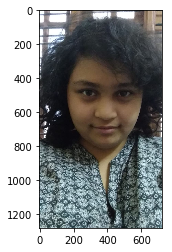

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
pic=img.imread('test_images/srija_test.jpeg')
plt.imshow(pic)


In [4]:
gender_predictor('t.jpg')

INFO:tensorflow:Restoring parameters from models/test_model3_gender.ckpt


'male'